# Analysis of Crimes reported in Chicago, New York and United States

# Author: Brijesh Taunk

# Primary dataset summary

The dataset gives information about the crimes committed in Chicago City from 2001 to present. It has columns that gives important information like the date of the crime, primary type of the crime (for example: theft, assault, robbery), description of the crime( pocket picking, retail theft), location description where the crime took place (like residence, bus etc.), whether any arrest took place in the case, the location information like district, ward, X and Y coordinates, the year it took place on, latitude and longitude of the location. It also has identity information like case number and ID. It contains a column which gives information whether the crime was Domestic or not.The dataset is regularly updated and it contains a columns which provides information about the time a particular case was last updated. The dataset has a column called "Beat" which basically provides information about an area that a particular police officer controls at that time. It has a total of 22 columns which provides all the information related to crime. The data is in CSV format. 

Now, we will perform necessary operations on dataset to make an interactive dashboard.

In [1]:
#importing necessary libraries
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib
import bqplot
%matplotlib inline
import bqplot.pyplot
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
# loading the data through relative path
chicago_crime = pd.read_csv('Crime-dataset1.csv')

In [3]:
# reading the dataset
chicago_crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,10237143,HY425136,9/14/2015 2:00,017XX S HALSTED ST,820,THEFT,$500 AND UNDER,RESTAURANT,True,False,...,25.0,31.0,6,1171312.0,1891693.0,2015,2/10/2018 15:50,41.858274,-87.646655,"(41.858273619, -87.646655052)"
8358,10237144,HY425160,9/16/2015 2:35,054XX W WASHINGTON BLVD,560,ASSAULT,SIMPLE,APARTMENT,False,False,...,28.0,25.0,08A,1140083.0,1900218.0,2015,2/10/2018 15:50,41.882296,-87.761078,"(41.882295519, -87.761077636)"
8359,10237145,HY425111,9/15/2015 23:40,075XX W BELMONT AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,36.0,17.0,08B,1125049.0,1920405.0,2015,2/10/2018 15:50,41.937953,-87.815837,"(41.937953284, -87.815836523)"
8360,10237147,HY425033,9/15/2015 10:00,007XX W 71ST ST,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,6.0,68.0,5,1172712.0,1857799.0,2015,2/10/2018 15:50,41.765234,-87.642516,"(41.765234306, -87.642516306)"


In [4]:
# Cleaning the data and dropping null values
chicago_crime_new = chicago_crime.dropna()

In [5]:
#replacing the True and False values in Arrest column by 'Y' and 'N'

#Using numpy to replace the True and False values under Arrest column by 'Y' and 'N'
chicago_crime_new['Arrest'] = np.where(chicago_crime_new['Arrest'], 'Y', 'N')
chicago_crime_new

C:\Users\brije\AppData\Local\Temp\ipykernel_20444\270163925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_crime_new['Arrest'] = np.where(chicago_crime_new['Arrest'], 'Y', 'N')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,N,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,N,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,Y,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,N,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,N,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,10237143,HY425136,9/14/2015 2:00,017XX S HALSTED ST,820,THEFT,$500 AND UNDER,RESTAURANT,Y,False,...,25.0,31.0,6,1171312.0,1891693.0,2015,2/10/2018 15:50,41.858274,-87.646655,"(41.858273619, -87.646655052)"
8358,10237144,HY425160,9/16/2015 2:35,054XX W WASHINGTON BLVD,560,ASSAULT,SIMPLE,APARTMENT,N,False,...,28.0,25.0,08A,1140083.0,1900218.0,2015,2/10/2018 15:50,41.882296,-87.761078,"(41.882295519, -87.761077636)"
8359,10237145,HY425111,9/15/2015 23:40,075XX W BELMONT AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,Y,True,...,36.0,17.0,08B,1125049.0,1920405.0,2015,2/10/2018 15:50,41.937953,-87.815837,"(41.937953284, -87.815836523)"
8360,10237147,HY425033,9/15/2015 10:00,007XX W 71ST ST,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,N,False,...,6.0,68.0,5,1172712.0,1857799.0,2015,2/10/2018 15:50,41.765234,-87.642516,"(41.765234306, -87.642516306)"


In [6]:
#creating the datafram using pivot table in pandas
pivot_data = pd.pivot_table(chicago_crime_new, index = 'Primary Type', columns = 'Location Description', values = 'ID', aggfunc = 'count', fill_value=0)

In [7]:
#reading the new dataframe
pivot_data

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,SPORTS ARENA/STADIUM,STREET,TAVERN/LIQUOR STORE,TAXICAB,VACANT LOT/LAND,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,WAREHOUSE
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
ASSAULT,1,0,0,0,0,0,1,0,0,1,...,1,92,1,0,0,1,1,1,0,0
BATTERY,1,0,0,1,0,0,0,0,0,0,...,3,207,3,3,1,2,0,17,1,2
BURGLARY,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,11,0,0,1,0,1
CONCEALED CARRY LICENSE VIOLATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRIM SEXUAL ASSAULT,1,0,0,0,0,0,0,0,0,0,...,0,4,0,0,1,0,0,1,0,0
CRIMINAL DAMAGE,3,0,0,0,0,1,0,0,0,0,...,1,367,2,0,3,0,0,14,0,0
CRIMINAL TRESPASS,1,0,0,0,0,0,0,2,0,1,...,2,12,0,0,0,0,0,2,0,0
DECEPTIVE PRACTICE,0,0,0,0,0,0,1,1,0,0,...,0,25,2,7,0,0,0,2,0,0


In [8]:
# defining the scales, setting them as ordinal and linear
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

# setting the axes, x and y and assigning labels and scales
x_axis = bqplot.Axis(label='Arrest Made or Not', scale=x_scale)
y_axis = bqplot.Axis(label='Count', scale=y_scale, 
                   orientation = 'vertical')

# creating the barplot mark and assigning scales
plot = bqplot.pyplot.bar(x = ['Y', 'N'], 
                         y = [0, 0],
                         scales={'x':x_scale, 'y':y_scale})

graph = bqplot.Figure(marks=[plot], axes=[x_axis,y_axis])

In [9]:
# defining the color scale for heatmap. Using NumPy nanmin and nanmax to calculate min and max for dataset
col_sc = bqplot.ColorScale(scheme='Red', min=float(np.nanmin(pivot_data)), max=float(np.nanmax(pivot_data)))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

#define the axis for our heatmap and assigning the labels and scales 
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Primary Type')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Location Description')

In [10]:
# Creating the heat map   
heat_map = bqplot.GridHeatMap(color=pivot_data.values, 
                             row = pivot_data.index, column = pivot_data.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

In [11]:
#passing the parameters x and y from plot function
def barplot(x, y):
    print('X: ' + x)
    print('Y: ' + y)
    df = chicago_crime_new[(chicago_crime_new['Primary Type'] == x) & (chicago_crime_new['Location Description'] == y)]
    # Counting the groupby of the Arrest column data with case ID
    df = df.groupby('Arrest')['ID'].count()
    return df

# Interactive Visualization using Primary dataset

In [12]:
# creating a mySelectedLabel for the value selected by the user
mySelectedLabel = ipywidgets.Label()

def on_select(change):
     # setting up a constraint to choose only one box
    if len(change['owner'].selected) == 1: 
        i,j = change['owner'].selected[0]
        v = pivot_data.values[i,j]
        dataset_latest = barplot(pivot_data.index[i], pivot_data.columns[j])
        print(dataset_latest)
        plot.x = dataset_latest.index.to_list()
        plot.y = dataset_latest.to_list()
        
heat_map.observe(on_select, 'selected')

heatmap_figure = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax], fig_margin={'top':0, 'bottom':100, 'left':250, 'right':100})

heatmap_figure.layout.min_width = '1200px'
graph.layout.min_width = '1200px'
myDashboard1 = ipywidgets.HBox([heatmap_figure, graph])
myDashboard = ipywidgets.VBox([mySelectedLabel, myDashboard1])
myDashboard

X: BURGLARY
Y: POOL ROOM
Series([], Name: ID, dtype: int64)
X: BURGLARY
Y: RESIDENCE
Arrest
N    115
Y     10
Name: ID, dtype: int64
X: BATTERY
Y: RESIDENCE
Arrest
N    226
Y     68
Name: ID, dtype: int64
X: BATTERY
Y: SIDEWALK
Arrest
N    204
Y     44
Name: ID, dtype: int64
X: BATTERY
Y: STREET
Arrest
N    166
Y     41
Name: ID, dtype: int64
X: CRIMINAL DAMAGE
Y: STREET
Arrest
N    346
Y     21
Name: ID, dtype: int64
X: NARCOTICS
Y: SIDEWALK
Arrest
Y    213
Name: ID, dtype: int64
X: LIQUOR LAW VIOLATION
Y: SIDEWALK
Arrest
Y    1
Name: ID, dtype: int64
X: NARCOTICS
Y: SIDEWALK
Arrest
Y    213
Name: ID, dtype: int64
X: NARCOTICS
Y: STREET
Arrest
Y    190
Name: ID, dtype: int64
X: MOTOR VEHICLE THEFT
Y: STREET
Arrest
N    191
Y     22
Name: ID, dtype: int64
X: MOTOR VEHICLE THEFT
Y: CREDIT UNION
Series([], Name: ID, dtype: int64)


The above interactive visualization and dashboard presents a heat map to us. It contains two columns in the heat map, first is 'Primary Type', which shows the type of crime committed, and 'Location Description', which shows the category of place where crime was committed. Whenever we click on any cell in heat map, a bar plot will be created on the right side, which will show how many arrests have been committed for the total number of crimes committed, and how many number of cases are there in which no arrest was made. The bar plot generated on the right uses another column 'Arrest' from the dataset. It shows 'Yes' or 'No' for arrests made in any particular case. The bar plot generated has Count on the Y-axis, and 'Yes' and 'No', for depicting arrests made, on the X-axis.

# Second Visualization using Primary dataset

In [13]:
#Using GroupBy and count on Primary Type column
crime_type = chicago_crime_new.groupby('Primary Type')['Primary Type'].count()

In [14]:
crime_type

Primary Type
ARSON                                  16
ASSAULT                               507
BATTERY                              1516
BURGLARY                              403
CONCEALED CARRY LICENSE VIOLATION       2
CRIM SEXUAL ASSAULT                    44
CRIMINAL DAMAGE                       931
CRIMINAL TRESPASS                     176
DECEPTIVE PRACTICE                    430
GAMBLING                               12
HOMICIDE                                1
INTERFERENCE WITH PUBLIC OFFICER       52
INTIMIDATION                            4
KIDNAPPING                              7
LIQUOR LAW VIOLATION                    4
MOTOR VEHICLE THEFT                   294
NARCOTICS                             611
NON - CRIMINAL                          1
OFFENSE INVOLVING CHILDREN             56
OTHER OFFENSE                         506
PROSTITUTION                           14
PUBLIC PEACE VIOLATION                 75
ROBBERY                               300
SEX OFFENSE          

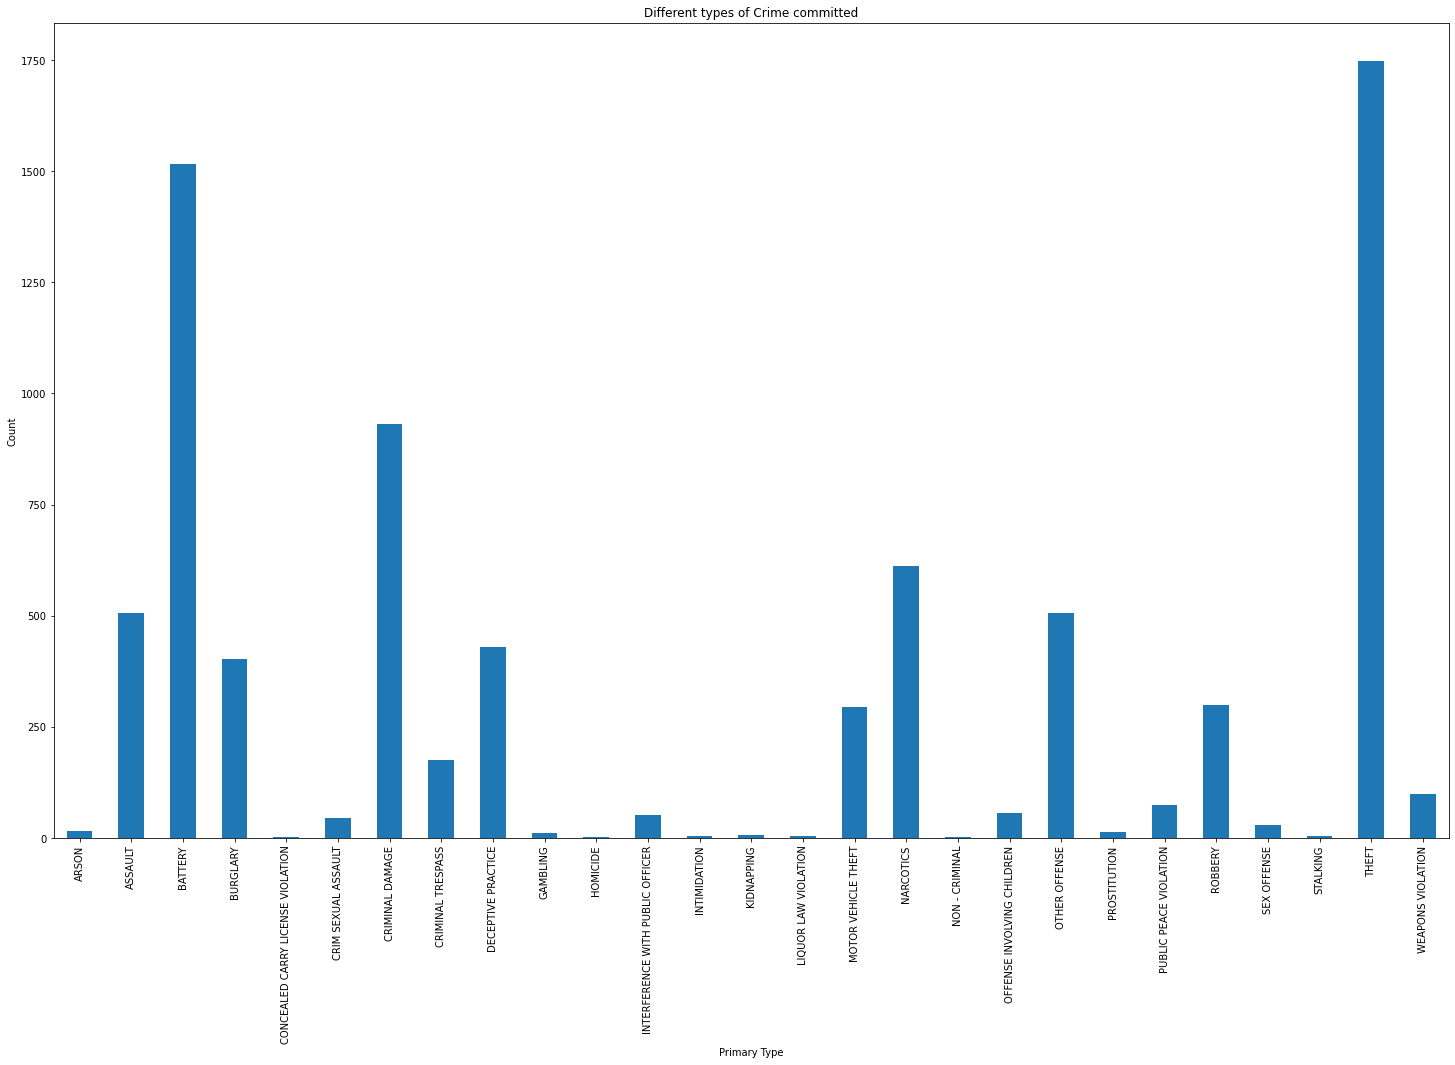

In [15]:
crime_type.plot.bar(figsize = (25, 15), xlabel= "Primary Type", ylabel = "Count", title = "Different types of Crime committed")

The above bar chart depicts the crimes occured in Chicago City from 2001 to 2021. It shows crime types and number of times they were committed. The number is shown in Millions. X axis shows the 'Crime Type' and Y axis shows the number of times a particular crime was committed. We can see that 'theft' was the most committed crime in the city. 'Battery' a type of assault, was the second highest type of crime committed. Apart from that 'Criminal damage' and 'Narcotics' are also committed on major basis. We can also see that number of cases of 'Kidnapping', 'license violation', 'Intimidation' and some few more crimes are low, when compared to 'Theft' and 'Assault'.

# Contextual Visualization 1

In [16]:
viz1 = Image.open("viz1.png") 

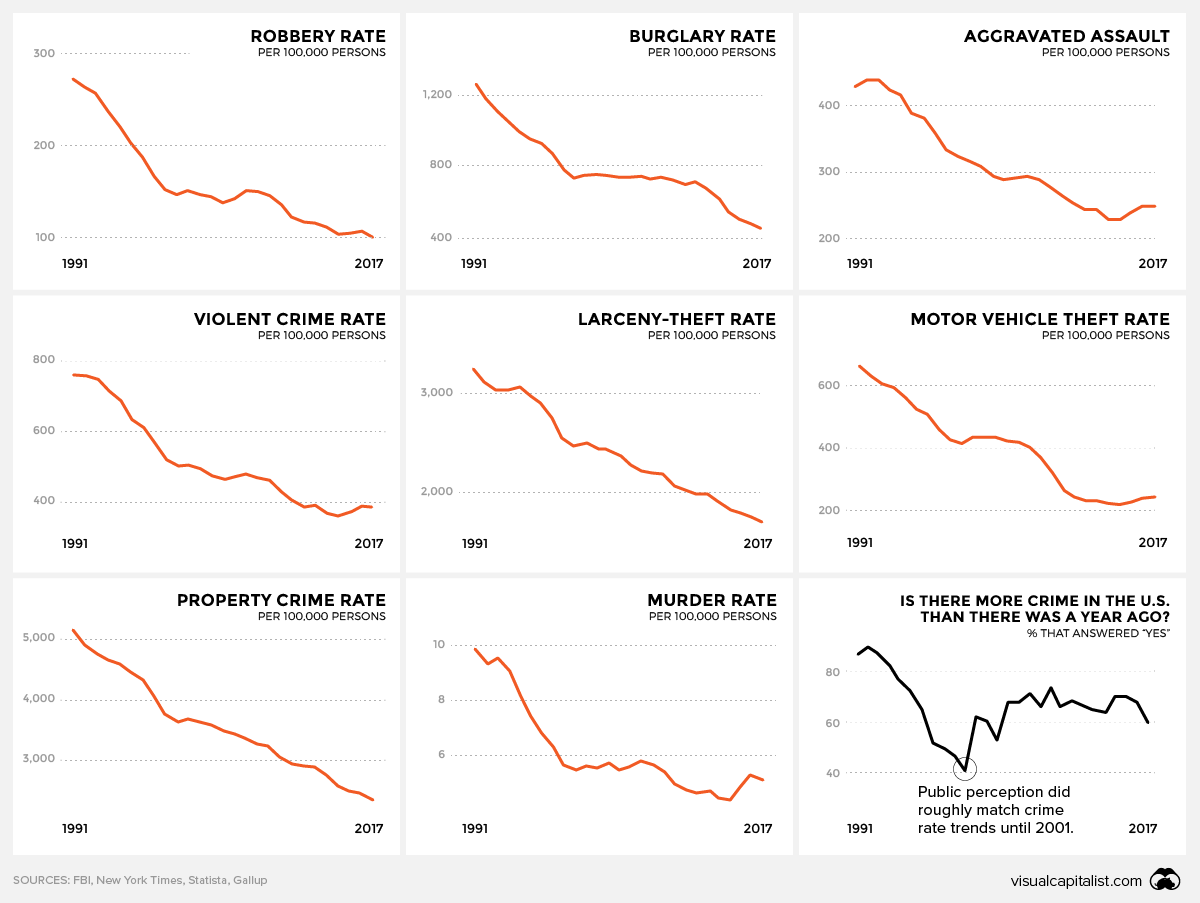

In [17]:
viz1

Above we have a visualization that depicts different types of crime rate in United States from 1991 to 2017. It is stated in form of number of cases per 100,000 people. My original dataset also contains crime cases of Chicago. The above visualization contains line charts of different crimes such as Robbery rate, burglary rate, aggravated assault, violent crime rate, larceny-theft rate, motor vehicle theft rate, property crime rate, and murder rate. We can see that every type of crime rate has dropped more than half of what the rate was in 1991. We can see that ‘Property Crime rate’ is very high than other crimes. Similar to our analysis of crimes done in Chicago’s crime primary dataset, we can also see a higher rate of Theft and assault, that shows that theft and assault consists of the major number of crimes in US.

# Contextual Visualization 2

In [18]:
viz2 = Image.open("viz2.png")

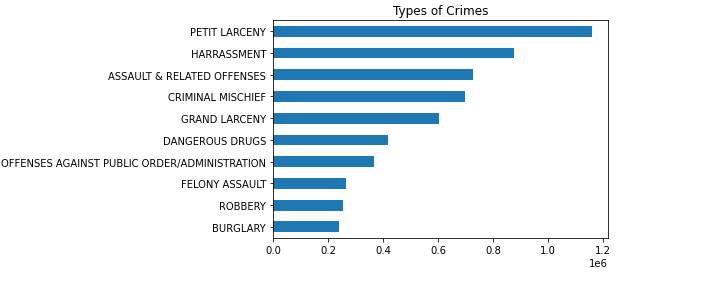

In [19]:
viz2

In the above bar chart, we have the visualization of crime cases of New York City from 2006 to 2019.  I have taken this visualization of New York City to compare the crime pattern with Chicago city. In graph, X axis shows the count of type of crime, while Y axis shows the different types of crimes reported in city. We can see that Larceny is the most committed crime in New York too. In my analysis of Chicago crime data, theft was the most frequently committed crime. Assault, and drugs are the other most reported crimes in New York. The same pattern was found in Chicago city in my analysis. We can conclude that there are major similarities in types of crimes committed in Chicago, and New York city.

References: My Final Project Part 2. 

Link to dataset: Publisher data.cityofchicago.org. (2022, May 5). Crimes - 2001 to present. Crimes - 2001 to Present - CKAN. Retrieved May 6, 2022, from https://catalog.data.gov/dataset/crimes-2001-to-present 

Citation of my first contextual visualization: Routley, N. (2019, March 12). The Crime Rate Perception Gap. Visual Capitalist. Retrieved May 6, 2022, from https://www.visualcapitalist.com/crime-rate-perception-gap/ 

Citation of my first contextual visualization: Mendes, B. (2021, February 27). Analysis of NYC reported crime data using pandas. Medium. Retrieved May 6, 2022, from https://towardsdatascience.com/analysis-of-nyc-reported-crime-data-using-pandas-821753cd7e22 